# Introduction to Machine Learning with Python 


## Module 2

### Learning Activity 1: Load the required libraries

In [1]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Extra plotting functionality 
import visplots 

from sklearn import preprocessing, metrics
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from scipy.stats.distributions import randint

% matplotlib inline

print "libraries all imported, ready to go"

libraries all imported, ready to go


### Learning Activity 2: Importing the data

The dataset we will be using throughout this workshop is an adapted version of the wine quality case study, available from the UCI Machine Learning repository at https://archive.ics.uci.edu/ml/datasets/Wine+Quality. The first thing you will need to do in order to work with the wine quality dataset is to read the contents from the provided `wine_quality.csv` data file using the `read_csv` command. You should also try to explore the first few rows of the imported wine DataFrame using the `head` function from the `pandas` package (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html):

In [12]:
chirus  = pd.read_csv("ef_data.csv", sep=",")
header = chirus.columns.values
chirus.head(n=12)

,learner,nationality,grade,sentence_wordcount_min,sentence_wordcount_avg,sentence_wordcount_max,wordcount,correctcount,cor_Agreement,cor_Article,...,cor_Preposition,cor_PartOfSpeech,cor_Punctuation,cor_Singular,cor_Spelling,cor_Verbtense,cor_Wordchoice,cor_WordOrder,cor_WordLimit,cor_Substitution
0,21016113,Chinese,85,5,8.7,15,26,0,0,0,...,0,0,0,0,0,0.0,0,0,0,0
1,20967075,Chinese,90,6,7.8,10,47,5,0,0,...,0,0,0,0,0,0.2,0,0,0,0
2,18898793,Chinese,95,5,10.2,15,41,0,0,0,...,0,0,0,0,0,0.0,0,0,0,0
3,20967191,Chinese,80,15,19.0,23,38,0,0,0,...,0,0,0,0,0,0.0,0,0,0,0
4,22604477,Chinese,87,5,7.8,16,39,0,0,0,...,0,0,0,0,0,0.0,0,0,0,0
5,22601651,Chinese,90,5,7.0,10,28,0,0,0,...,0,0,0,0,0,0.0,0,0,0,0
6,22604175,Chinese,58,5,5.5,6,11,0,0,0,...,0,0,0,0,0,0.0,0,0,0,0
7,22604175,Chinese,100,5,5.5,6,11,0,0,0,...,0,0,0,0,0,0.0,0,0,0,0
8,22621821,Chinese,89,5,11.2,25,56,0,0,0,...,0,0,0,0,0,0.0,0,0,0,0
9,22618683,Chinese,89,10,14.3,18,43,0,0,0,...,0,0,0,0,0,0.0,0,0,0,0


In order to feed the data into our classification models and sklearn, the imported wine quality DataFrame needs to be converted into a `numpy` array. For more information on numpy arrays, see http://scipy-lectures.github.io/intro/numpy/array_object.html. 

In addition, it is always a good practice to **always** check the dimensionality of the imported data using the `shape` command prior to constructing any classification model to check that you really have imported all the data and imported it in the correct way (e.g. one common mistake is to get the separator wrong and end up with only one column). 

In [6]:
npArray = np.array(chirus)
print npArray.shape

(4500, 32)


### Learning Activity 3: Inspect your data by indexing and index slicing

To select elements in an array, you specify their indices with square bracket notation. For a two-dimensional array, the first index indicates the row number and the second index indicates the column number. Try selecting the values of the first and second columns of the first sample in the npArray:

In [7]:
print npArray[0,0]

21016113


In [8]:
print npArray[0,1]

Chinese


To select ranges of elements, we use "index slicing". Index slicing is the technical name for the syntax A[lower:upper], where lower refers to the lower bound index that is included, and upper refers to the upper bound index that is not included. Try selecting the first three samples (rows):

and also the first three samples (rows) of the last column:

In [9]:
print npArray[:3, 3]# Print the first 3 rows from the last column of npArray

[5 6 5]


### Learning Activity 4: Split the data into input features, X, and outputs, y

Subsequently, we need to split our initial dataset into the data matrix X (independent variable) and the associated class vector y (dependent or target variable). The input features, _X_,  are the variables that you use to predict the outcome. In this data set, there are ten input features stored in columns 1-10 (index 0-9, although the upper bound is not included so the range for indexing is 0:10), all of which have continuous values. The output label, _y_, holds the information of whether the wine has been rated as high or low quality, and is stored in the final (eleventh) column (index 10). To split the data, we need to assign the columns of the input features and the columns of the output labels to different arrays:

In [215]:
X = npArray[:,2:].astype(float)
y = npArray[:,1]

Try printing the size of the input matrix _X_ and class vector _y_ using the "`shape`" command:

In [216]:
print X.shape
print y.shape

(4500, 30)
(4500,)


## Exploratory Data Analysis

Exploratory data analysis (EDA) is the field dealing with the analysis of data sets as a means of summarising their main characteristics, often using visual methods.


### Learning Activity 5: Plot y frequencies 

An important thing to understand before applying any classification algorithms is how the output labels are distributed. Are they evenly distributed? Imbalances in distribution of labels can often lead to poor classification results for the minority class even if the classification results for the majority class are very good. 

In [217]:
yFreq = scipy.stats.itemfreq(y)
print yFreq

[['Chinese' 3000]
 ['Russian' 1500]]


In our current dataset, the _y_ values are categorical (i.e. they can only take one of a discrete set of values) and have a non-numeric representation, "high" vs. "low". This can be problematic for scikit-learn and plotting functions in Python, since they assume numerical values, so we need to map the text categories to numerical representations using `LabelEncoder`  and the `fit_transform` function from the `preprocessing` module:

In [218]:
le = preprocessing.LabelEncoder()
y  = le.fit_transform(y)

yFreq = scipy.stats.itemfreq(y)
print yFreq

[[   0 3000]
 [   1 1500]]


Visualising the data in some way is a good way to get a feel for how the data is distributed. As a simple example, try plotting the frequencies of the class labels (held in _yFreq_), 1 and 0, and see how they are distributed using the function `bar()`:

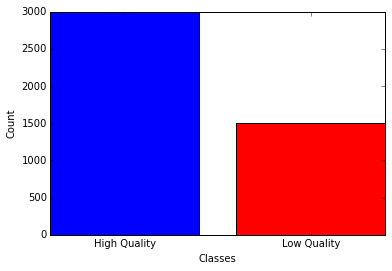

In [219]:
fig, ax = plt.subplots()

classFreq = yFreq[0][1], yFreq[1][1]
classes   = 'High Quality', 'Low Quality'

plt.bar(range(len(classes)), classFreq, align='center', color=('blue','red'))
plt.xticks(range(len(classes)), classes)
plt.xlabel('Classes')
plt.ylabel('Count')

plt.show()

ax.set_ylim(0,1200)
for rect in ax.patches:
    height = rect.get_height()
    ax.text(x = rect.get_x()+rect.get_width()/2., y = height, s= height,
            ha='center', va='bottom')

### Learning Activity 6: Scale the data

It is usually advisable to scale your data prior to fitting a classification model to avoid attributes with
greater numeric ranges dominating those with smaller numeric ranges. Boxplots are a powerful visual aid, commonly used
in order to investigate the differences in ranges of the input features. For example, try and plot the features of the _raw_ matrix _X_ using the script for the boxplots:

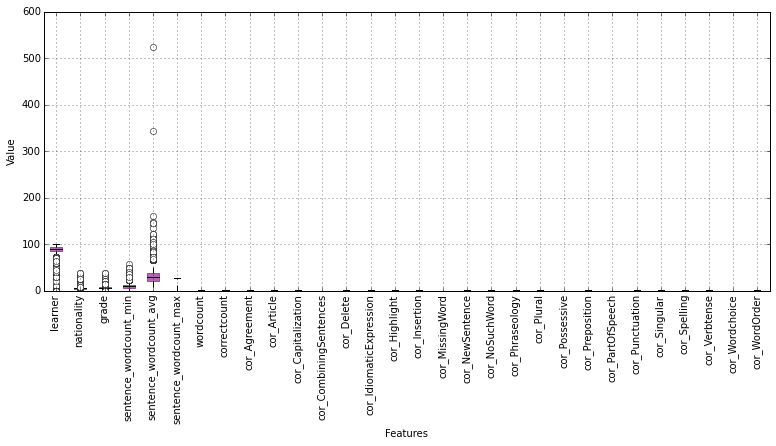

In [220]:
fig, ax = plt.subplots(figsize=(13, 5))
box = plt.boxplot(X, patch_artist=True)
ax.set_xticklabels(header, rotation=90)

# Change the colors, marker and transparency of the following elements
plt.setp(box['fliers'],   color='white',  marker='o')
plt.setp(box['boxes'],    color='purple', alpha=0.6)
plt.setp(box['medians'],  color='black')
plt.setp(box['whiskers'], color='black')

# Add axes titles
plt.xlabel('Features')
plt.ylabel('Value')

plt.grid()
plt.show()

There are many ways of scaling but one common scaling mechanism is auto-scaling, where for each
column, the values are centred around the mean and divided by their standard deviation. This scaling
mechanism can be applied by calling the `scale()` function in scikit-learn’s `preprocessing` module.

In [221]:
X = preprocessing.scale(X)

If we re-run the previous plotting script, we can have a look at the outcome of the boxplot after scaling:

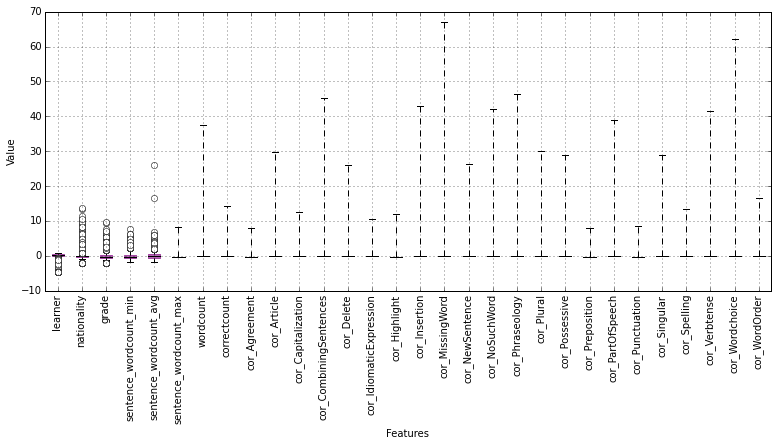

In [222]:
fig, ax = plt.subplots(figsize=(13, 5))
box = plt.boxplot(X, patch_artist=True)
ax.set_xticklabels(header, rotation=90)

# Change the colors, marker and transparency of the following elements
plt.setp(box['fliers'],   color='white',  marker='o')
plt.setp(box['boxes'],    color='purple', alpha=0.6)
plt.setp(box['medians'],  color='black')
plt.setp(box['whiskers'], color='black')

# Add axes titles
plt.xlabel('Features')
plt.ylabel('Value')

plt.grid()
plt.show()

### Learning Activity 7:  Plot pairs of input features X as scatter plots

You can visualise the relationship between two variables (features) using a simple scatter plot. This step can give you a good first indication of the ML model model to apply and its complexity (linear vs. non-linear). At this stage, let’s plot the first two variables against each other:

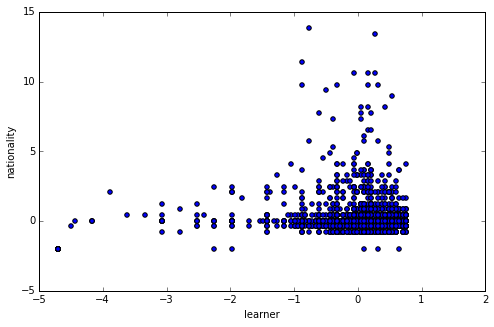

In [223]:
f1 = 0
f2 = 1

plt.figure(figsize=(8, 5))
plt.scatter(x = X[:, f1], y = X[:, f2])
plt.xlabel(header[f1])
plt.ylabel(header[f2])
plt.show()

We can also relate associations between features to their y classifications by making the colour of
the points dependent on the corresponding y value:

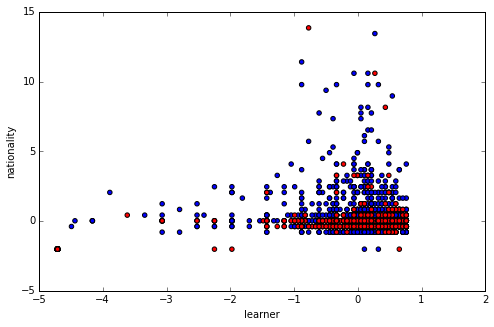

In [224]:
plt.figure(figsize=(8, 5))
plt.scatter(x = X[:, f1], y = X[:, f2], c=y, cmap="bwr")
plt.xlabel(header[f1])
plt.ylabel(header[f2])
plt.show()

### Learning Activity 8: Bonus 1 - Try different combinations of f1 and f2 (in a grid if you can).

Hint: you may want to use nested loops, and the functions `subplot()` and `tight_layout()`

### Learning Activity 9: Bonus 2 -  Try plotting different combinations of three features (f1, f2, f3) in the same plot.

Hint: you may want to use the `Axes3D` function from the `mpl_toolkits.mplot3d` package

In [226]:
# Create a 3D scatterplot using the first three features

### Learning Activity 10: Bonus 3 -  Create a correlation matrix and plot a heatmap of correlations between the input features in X

Often, the different features (variables) in X are not completely independent from each other. For example,
fixed acidity is related to volatile acidity. To quickly identify which features are related and to
what extent, it is useful to see how they are correlated. You can do this by creating a correlation matrix
from X using `corrcoef()` in the `numpy` module:

In [171]:
# Calculate the correlation coefficient

To search for linear relationships between features across all pairs of features, you can use a heatmap
of correlations (directly from X), which is simply a matrix of subplots whose colours represent the
sizes of the correlations:

In [172]:
# Create a heatmap of the correlation coefficients

## Module 3

### Learning Activity 11: Split the data into training and test sets

Training and testing a classification model on the same dataset is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data (poor generalisation). To use different datasets for training and testing, we need to split the wine dataset into two disjoint sets: train and test (**Holdout method**) using the `train_test_split` function. <br/> 

In [173]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, random_state=1)

XTrain and yTrain are the two arrays you use to train your model. XTest and yTest are the two arrays that you use to evaluate your model. By default, scikit-learn splits the data so that 25% of it is used for testing, but you can also specify the proportion of data you want to use for training and testing.

<br/>You can check the sizes of the different training and test sets by using the `shape` attribute:

In [174]:
print "XTrain dims: ", XTrain.shape
print "yTrain dims: ", yTrain.shape
print "XTest dims: ", XTest.shape
print "yTest dims: ", yTest.shape

XTrain dims:  (3375, 8)
yTrain dims:  (3375,)
XTest dims:  (1125, 8)
yTest dims:  (1125,)


You can also investigate how the class labels are distributed within the *yTest* vector by using the `itemfreq` function as previously

In [227]:
yFreq = scipy.stats.itemfreq(yTest)
print yFreq

[[  0 728]
 [  1 397]]


We can see that 129 random samples of class 0 (high quality) and 243 random samples of class 1 (low quality) are included in the yTest set.


### Learning Activity 12: Apply KNN classification algorithm with scikit-learn

In [228]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(XTrain, yTrain)
yPredK3 = knn3.predict(XTest)

print "Overall Accuracy:", round(metrics.accuracy_score(yTest, yPredK3), 2)


Overall Accuracy: 0.67


To build KNN models using scikit-learn, you will be using the `KNeighborsClassifier` object, which allows you to set the value of K using the `n_neighbors` parameter (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). The optimal choice for the value K is highly data-dependent: in general a larger K suppresses the effects of noise, but makes the classification boundaries less distinct. <br/>


For every classification model built with scikit-learn, we will follow four main steps: 1) **Building** the classification model (using either default, pre-defined or optimised parameters), 2) **Training** the model with data, 3) **Testing** the model, and 4) **Performance evaluation** using various metrics. <br/> <br/>

We are going to start by trying two pre-defined random values of K and compare their performance. Let us start with a small number of K such as K=3.

Let us try a larger value of K, for instance K = 99 or another number of your own choice; remember, it is good practice to select an **odd** number for K in a binary classification problem to avoid ties. Can you generate the KNN model and print the overall performance for a larger K (such as K=99) using as guidance the previous example? 

In [229]:
knn99 = KNeighborsClassifier(n_neighbors=99)
knn99.fit(XTrain, yTrain)
yPredK99 = knn99.predict(XTest)

print "Overall Accuracy:", round(metrics.accuracy_score(yTest, yPredK99), 2)

Overall Accuracy: 0.72


### Learning Activity 13: Calculate validation metrics for your classifier

In a classification task, once you have created your predictive model, you will need to evaluate it. Evaluation functions help you to do this by reporting the performance of the model through four main performance metrics: precision, recall and specificity for the different classes, and overall accuracy. To understand these metrics, it is useful to create a _confusion matrix_, which records all the true positive, true negative, false positive and false negative values.

We can compute the confusion matrix for our classifier using the `confusion_matrix` function in the `metrics` module.


In [230]:
mat = metrics.confusion_matrix(yTest, yPredK3)
print mat

[[586 142]
 [226 171]]



Because performance metrics are such an important step of model evaluation, scikit-learn offers a wrapper around these functions, `metrics.classification_report`, to facilitate their computation. It also offers the function `metrics.accuracy_score` that we tried before to compute the overall accuracy.


In [231]:
print metrics.classification_report(yTest, yPredK3)
print "accuracy: ", round(metrics.accuracy_score(yTest, yPredK3), 2)

             precision    recall  f1-score   support

          0       0.72      0.80      0.76       728
          1       0.55      0.43      0.48       397

avg / total       0.66      0.67      0.66      1125

accuracy:  0.67


### Learning Activity 14: Plot the decision boundaries for different models

We can visualise the classification boundary created by the KNN classifier using the built-in function `visplots.knnDecisionPlot`. For easier visualisation, only the test samples are depicted in the plot. Remember though that the decision boundary has been built using the _training_ data! <br/> 

Help on function knnDecisionPlot in module visplots:

knnDecisionPlot(XTrain, yTrain, XTest, yTest, n_neighbors, weights='uniform')



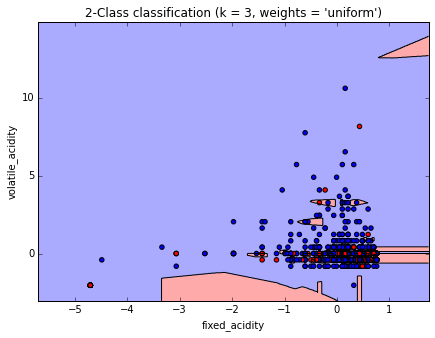

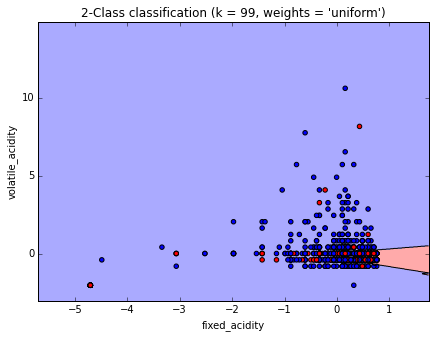

In [232]:
help(visplots.knnDecisionPlot)

# Visualise the boundaries
visplots.knnDecisionPlot(XTrain, yTrain, XTest, yTest, n_neighbors=3)
visplots.knnDecisionPlot(XTrain, yTrain, XTest, yTest, n_neighbors=99)

** Answer: <BR/> For smaller values of K the decision boundaries present many "creases". In this case the models may suffer from instances of overfitting. For larger values of K, we can see that the decision boundaries are less distinct and tend towards linearity. In these cases the boundaries may be too simple and unable to learn thus leading to cases of underfitting. **

### Learning Activity 15 - Bonus: Try different weight configurations

Under some circumstances, it is better to give more importance ("weight" in computing terms) to nearer neighbors. This can be accomplished through the `weights` parameter.  When `weights = 'distance'`, weights are assigned to the training data points in a way that is proportional to the inverse of the distance from the query point. In other words, nearer neighbors contribute more to the fit. <br/>

What if we use weights based on distance? Does it improve the overall performance?

             precision    recall  f1-score   support

          0       0.72      0.81      0.76       728
          1       0.55      0.44      0.49       397

avg / total       0.66      0.68      0.67      1125

Overall Accuracy: 0.68


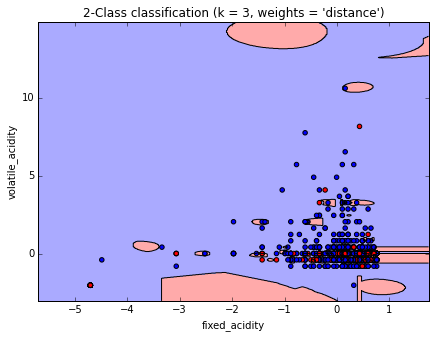

In [233]:
knnW3 = KNeighborsClassifier(n_neighbors=3, weights='distance')
knnW3.fit(XTrain, yTrain)
predictedW3 = knnW3.predict(XTest)

print metrics.classification_report(yTest, predictedW3)
print "Overall Accuracy:", round(metrics.accuracy_score(yTest, predictedW3), 2)

visplots.knnDecisionPlot(XTrain, yTrain, XTest, yTest, n_neighbors= 3, weights="distance")

## Module 4

### Learning Activity 16: Implement k-fold cross-validation

Let us estimate the accuracy of the classifier on the wine quality dataset by splitting the data 5 consecutive times (the parameter cv gives the number of samples the data is split into) using the `cross_val_score` function. For example, try to implement cross-validation for knn3, your KNN model with k=3:


In [191]:
knn3scores = cross_val_score(knn3, XTrain, yTrain, cv = 5)
print knn3scores
print "Mean of scores KNN3", knn3scores.mean()


[ 0.68491124  0.70710059  0.71555556  0.69287834  0.70623145]
Mean of scores KNN3 0.701335436432


### Parameter Tuning

### Learning Activity 17: Grid search on hyperparameters

Rather than trying one-by-one predefined values of K, we can automate this process. The scikit-learn library provides the grid search function `GridSearchCV` (http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html), which allows us to exhaustively search for the optimum combination of parameters by evaluating models trained with a particular algorithm with all provided parameter combinations. Further details and examples on grid search with scikit-learn can be found at http://scikit-learn.org/stable/modules/grid_search.html <br/>

You can use the `GridSearchCV` function with the validation technique of your choice (in this example, 10-fold cross-validation has been applied) to search for a parametisation of the KNN algorithm that gives a more optimal model:

In [446]:
n_neighbors = np.arange(1,61, 2)
weights     = ['uniform','distance']
parameters  = [{'n_neighbors': n_neighbors, 'weights': weights}]

grid = GridSearchCV(KNeighborsClassifier(), parameters, cv=10)
grid.fit(XTrain, yTrain)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid=[{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59]), 'weights': ['uniform', 'distance']}],
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

Now we can find and print the best parameter set:

In [447]:
bestNeighbors = grid.best_params_['n_neighbors']
bestWeight    = grid.best_params_['weights']

print "Best parameters: n_neighbors=", bestNeighbors, "and weight=", bestWeight

Best parameters: n_neighbors= 49 and weight= uniform


We can also graphically represent the results of the grid search using a heatmap:

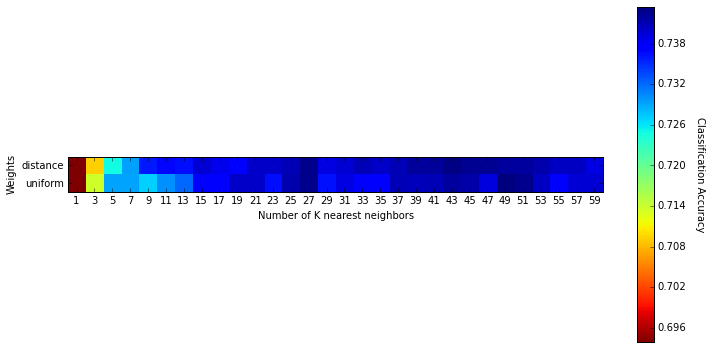

In [448]:
scores = [x[1] for x in grid.grid_scores_]
scores = np.array(scores).reshape(len(n_neighbors), len(weights))
scores = np.transpose(scores)

# Make a heatmap with the performance
plt.figure(figsize=(12, 6))
plt.imshow(scores, interpolation='nearest', origin='higher', cmap='jet_r')
plt.xticks(np.arange(len(n_neighbors)), n_neighbors)
plt.yticks(np.arange(len(weights)), weights)
plt.xlabel('Number of K nearest neighbors')
plt.ylabel('Weights')

# Add the colorbar
plt.colorbar().set_label('Classification Accuracy', rotation=270, labelpad=20)
plt.show()

When evaluating the resulting model it is important to do it on held-out samples that were not seen during the grid search process (XTest). <Br/>
So, we are testing our independent XTest dataset using the optimised model:

In [241]:
knn = KNeighborsClassifier(n_neighbors=bestNeighbors, weights=bestWeight)
knn.fit(XTrain, yTrain)
yPredKnn = knn.predict(XTest)

print metrics.classification_report(yTest, yPredKnn)
print "Overral Accuracy:", round(metrics.accuracy_score(yTest, yPredKnn), 2)

             precision    recall  f1-score   support

          0       0.72      0.91      0.81       728
          1       0.69      0.35      0.46       397

avg / total       0.71      0.71      0.68      1125

Overral Accuracy: 0.71


### Learning Activity 18: Randomized search on hyperparameters

Unlike `GridSearchCV`, `RandomizedSearchCV` does not exhaustively try all the parameter settings. Instead, it samples a fixed number of parameter settings based on the distributions you specify (e.g. you might specify that one parameter should be sampled uniformly while another is sampled following a Gaussian distribution). The number of parameter settings that are tried is given by `n_iter`. If all parameters are presented as a list, sampling without replacement is performed. If at least one parameter is given as a distribution, sampling with replacement is used. You should use continuous distributions for continuous parameters. Further details can be found at http://scikit-learn.org/stable/modules/grid_search.html

In [440]:
param_dist = {'n_neighbors': randint(1,200)}
random_search = RandomizedSearchCV(KNeighborsClassifier(),
                                   param_distributions=param_dist, n_iter=30)
random_search.fit(XTrain, yTrain)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform'),
          fit_params={}, iid=True, n_iter=30, n_jobs=1,
          param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x10d300e50>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring=None, verbose=0)

As with the previous example, we can print out the optimal parameters: 

In [441]:
bestNeighbors = random_search.best_params_['n_neighbors']
print "Best parameters: n_neighbors=", bestNeighbors



Best parameters: n_neighbors= 38


We can also graphically represent the results of the randomised search using a scatterplot:

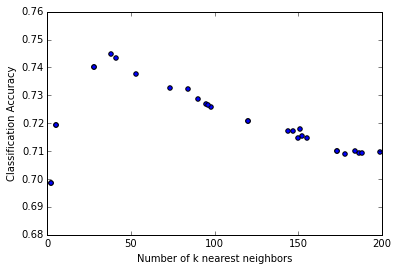

In [442]:

neig = [score_tuple[0]['n_neighbors'] for score_tuple in random_search.grid_scores_]
res = [score_tuple[1] for score_tuple in random_search.grid_scores_]
# Create the scatterplot
plt.scatter(neig, res)
plt.xlabel('Number of k nearest neighbors')
plt.ylabel('Classification Accuracy')
plt.xlim(0,200)
plt.show()

Finally, testing our independent XTest dataset using the optimised model: 

In [456]:
knn = KNeighborsClassifier(n_neighbors=bestNeighbors)
knn.fit(XTrain, yTrain)
yPredKnn = knn.predict(XTest)

print metrics.classification_report(yTest, yPredKnn)
print "Overall Accuracy:", round(metrics.accuracy_score(yTest, yPredKnn), 2)

             precision    recall  f1-score   support

          0       0.72      0.93      0.81       728
          1       0.73      0.34      0.46       397

avg / total       0.72      0.72      0.69      1125

Overall Accuracy: 0.72


## Module 5

### Learning Activity 19:  Random Forests

The random forests model is an `ensemble method` since it aggregates a group of decision trees into an ensemble (http://scikit-learn.org/stable/modules/ensemble.html). Ensemble learning involves the combination of several models to solve a single prediction problem. It works by generating multiple classifiers/models which learn and make predictions independently. Those predictions are then combined into a single (mega) prediction that should be as good or better than the prediction made by any one classifer. Unlike single decision trees which are likely to suffer from high Variance or high Bias (depending on how they are tuned) Random Forests use averaging to find a natural balance between the two extremes. <br/> 

Let us start by building a simple Random Forest model which consists of 100 independently trained decision trees. For further details and examples on how to construct a Random Forest, see http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [252]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(XTrain, yTrain)
predRF = rf.predict(XTest)

print metrics.classification_report(yTest, predRF)
print "Overall Accuracy:", round(metrics.accuracy_score(yTest, predRF),1)

             precision    recall  f1-score   support

          0       0.74      0.85      0.79       728
          1       0.61      0.44      0.51       397

avg / total       0.69      0.70      0.69      1125

Overall Accuracy: 0.7


### Learning Activity 20: Visualising the RF accuracy

We can also investigate how the overall test accuracy gets influenced with the increase of `n_estimators` (decision trees) in our model. In order to do so, we can use the provided `rfAvgAcc` function from `visplots`:

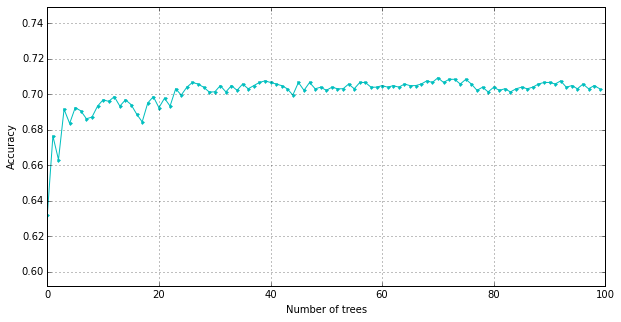

In [253]:
visplots.rfAvgAcc(rfModel=rf, XTest=XTest, yTest=yTest)

### Learning Activity 21: Feature Importance 

Random forests allow you to compute a heuristic for determining how “important” a feature is in predicting a target. This heuristic measures the change in prediction accuracy if you take a given feature and permute (scramble) it across the datapoints in the training set. The more the accuracy drops when the feature is permuted, the more “important” we can conclude the feature is.

We can use the `feature_importances_` attribute of the RF classifier to obtain the relative importance of each feature, which we can then visualise using a simple bar plot.

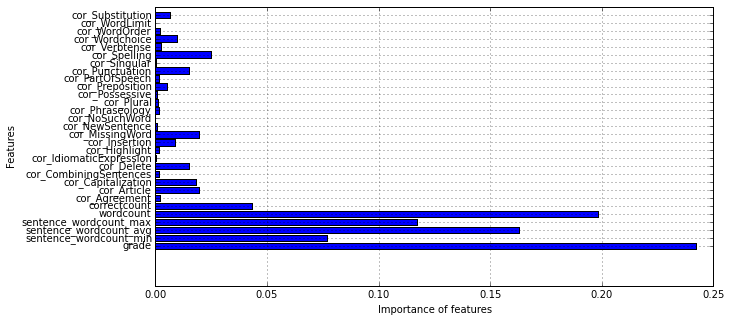

In [311]:
imp = rf.feature_importances_
names = header[2:]

fig, ax = plt.subplots(figsize=(10, 5))
plt.barh(range(len(names)), imp, align='center')
plt.yticks(range(len(names)), names)
plt.xlabel('Importance of features')
plt.ylabel('Features')
plt.grid()

plt.show()

###  Learning activity 22: Boundary visualisation

We can visualise the classification boundary created by the Random Forest using the `visplots.rfDecisionPlot` function. You can check the arguments passed in this function by using the `help` command. For easier visualisation, only the test samples have been included in the plot. And remember that the decision boundary has been built using the _training_ data!

Help on function rfDecisionPlot in module visplots:

rfDecisionPlot(XTrain, yTrain, XTest, yTest, n_estimators=10)



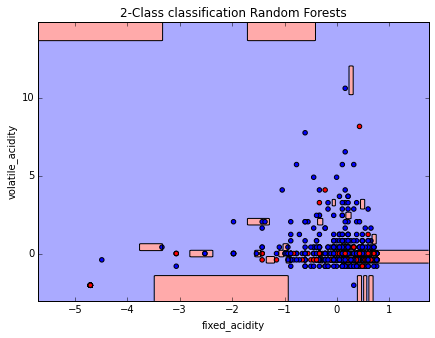

In [313]:
# Check the arguments of the function
help(visplots.rfDecisionPlot)

# Visualise the boundaries
visplots.rfDecisionPlot(XTrain, yTrain, XTest, yTest)

### Learning Activity 23: Tuning Random Forests

Random forests offer several parameters that can be tuned. In this case, parameters such as `n_estimators`, `max_features`, `max_depth` and `min_samples_leaf` can be some of the parameters to be optimised. 

In [314]:
help(RandomForestClassifier())

Help on RandomForestClassifier in module sklearn.ensemble.forest object:

class RandomForestClassifier(ForestClassifier)
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and use averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  
 |  Parameters
 |  ----------
 |  n_estimators : integer, optional (default=10)
 |      The number of trees in the forest.
 |  
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |      Note: this parameter is tree-specific.
 |  
 |  max_features : int, float, string or None, optional (default="auto")
 |      The number of features to consider when looking for the best split:
 |  
 |      - If int, then consider `max_features` features at each split.
 |      - If 

Create a dictionary of allowed parameter ranges for `n_estimators` and `max_depth` (or include more of the parameters you would like to tune) and conduct a grid search with cross validation using the `GridSearchCV` function as before:

In [344]:
# Conduct a grid search with 10-fold cross-validation using the dictionary of parameters
n_estimators = [50,100]
max_depth    = [5, 10, 15]
criterion = ["gini", "entropy"]
parameters   = [{'n_estimators': n_estimators, 'max_depth': max_depth,'criterion':criterion}]

grid = GridSearchCV(RandomForestClassifier(), param_grid=parameters, cv=10, n_jobs=-1)
grid.fit(XTrain, yTrain)


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=-1,
       param_grid=[{'n_estimators': [50, 100], 'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 15]}],
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

Now we can find and print the best parameter set:

In [400]:
n_estimators = [40,45,49]
max_depth    = [10]
criterion = ["gini", "entropy"]

parameters   = [{'n_estimators': n_estimators, 'max_depth': max_depth,'criterion':criterion}]

grid = GridSearchCV(RandomForestClassifier(), param_grid=parameters, cv=10, n_jobs=-1)
grid.fit(XTrain, yTrain)


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=-1,
       param_grid=[{'n_estimators': [40, 45, 49], 'criterion': ['gini', 'entropy'], 'max_depth': [10]}],
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

Finally, testing our independent XTest dataset using the optimised model: 

In [401]:
best_n_estim      = grid.best_params_['n_estimators']
best_max_depth    = grid.best_params_['max_depth']
best_criterion = grid.best_params_['criterion']

print ("Best parameters: n_estimators=", best_n_estim,"max_depth=", best_max_depth,"maxcriterion",best_criterion )

('Best parameters: n_estimators=', 45, 'max_depth=', 10, 'maxcriterion', 'gini')


Bonus: We can also graphically represent the results of the grid search using a heatmap:

In [432]:
print ("Best parameters: n_estimators=", best_n_estim,", max_depth=", best_max_depth)


clfRDF = RandomForestClassifier(n_estimators=best_n_estim, max_depth=best_max_depth)
clfRDF.fit(XTrain, yTrain)
predRF = clfRDF.predict(XTest)
print metrics.classification_report(yTest, predRF)
print "Overall Accuracy:", round(metrics.accuracy_score(yTest, predRF),3)



('Best parameters: n_estimators=', 45, ', max_depth=', 10)
             precision    recall  f1-score   support

          0       0.74      0.94      0.83       728
          1       0.79      0.40      0.53       397

avg / total       0.76      0.75      0.72      1125

Overall Accuracy: 0.748


### Learning Activity 24: Bonus - Parallelisation


The scikit-learn implementation of Random Forests also features the parallel construction of the trees and the parallel computation of the predictions through the n_jobs parameter.
If `n_jobs=k` then computations are partitioned into k jobs, and run on k cores of the machine.
If `n_jobs=-1` then all cores available on the machine are used.


In [393]:
# 1. Build a RF classification model using parallelisation
# 2. Try and tune its parameters using parallel processing
# 3. Import the `timeit` module and use the `default_timer` function to calculate the speedup from sequential to parallel processing
# 4. Can you plot the execution times with incremental number of processors?

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(XTrain, yTrain)
predRF = rf.predict(XTest)

print metrics.classification_report(yTest, predRF)
print "Overall Accuracy:", round(metrics.accuracy_score(yTest, predRF),1)

             precision    recall  f1-score   support

          0       0.75      0.86      0.80       728
          1       0.64      0.47      0.54       397

avg / total       0.71      0.72      0.71      1125

Overall Accuracy: 0.7
